### 5. **Análisis de Correlación y Regresión**
**Resumen:** Se centra en la identificación de relaciones significativas entre las variables numéricas y el desarrollo de modelos de regresión para hacer predicciones basadas en esas relaciones.

In [2]:
import numpy as np
import pandas as pd

import utils.MAGic_Avocado_utils as magic

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import root_mean_squared_error # ?????


In [3]:
# Carga el dataset
df_orig = pd.read_csv("./dataset/avocado.csv")
df_orig

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
# Copia del dataframe para preservar datos originales
df = df_orig.copy()

In [5]:
# Añade columna con categorización de City/Region/GreaterRegion/TotalUS
df['cat_region'] = df['region'].transform(lambda x: magic.get_truly_region(x))
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,cat_region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,City
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,City
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,City
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,City
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Region
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Region
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Region
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Region


In [6]:
# Convierte 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Prepara filtro de filas para tener en cuenta sólo verdaderamente GreaterRegion
greater_regions = df[df['cat_region']=='GreaterRegion']
greater_regions.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,cat_region
312,0,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California,GreaterRegion
313,1,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California,GreaterRegion
314,2,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California,GreaterRegion
315,3,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California,GreaterRegion
316,4,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California,GreaterRegion


#### 1. **Matriz de Correlación:**

 
   - **Uso de Datos:** Utiliza las columnas numéricas del DataFrame (p. ej., `AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`).
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Calcula la matriz de correlación usando el método `.corr()` del DataFrame.
     - Visualiza la matriz utilizando `sns.heatmap()`. 
     - Anota las correlaciones más significativas y discute su posible impacto en el análisis.

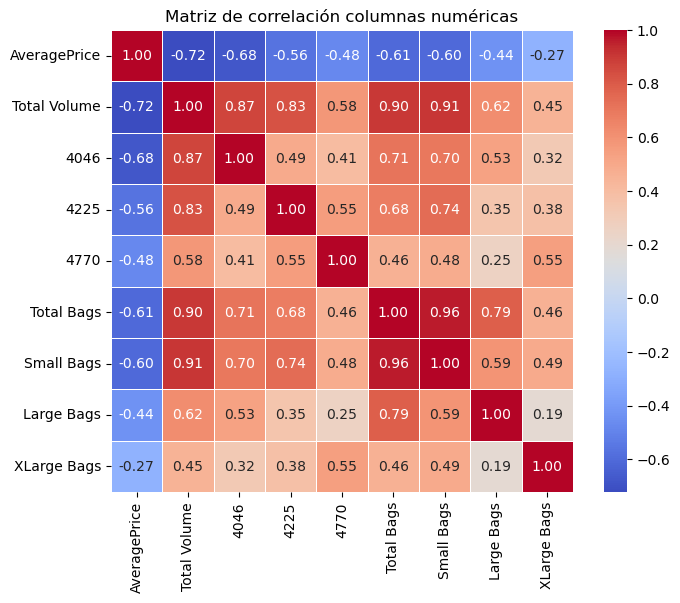

In [83]:
df_corr=greater_regions[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' ]]
matriz_corr=df_corr.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Matriz de correlación columnas numéricas')
plt.show()

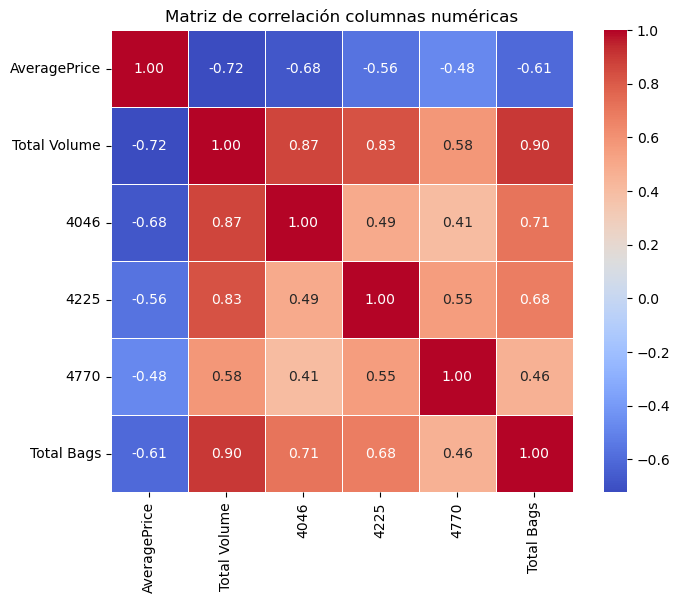

In [84]:
#Sabemos que Total Bags es la combinación de Small Bags, Large Bags i XLarge Bags, así que sacamos esas tres y dejamos solo Total Bags
df_corr2=greater_regions[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags' ]]
matriz_corr2=df_corr2.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(matriz_corr2, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Matriz de correlación columnas numéricas')
plt.show()

Podemos ver que el total volume está altamente correlacionado con el total bags y también la variedad 4046 y 4225. Esto es porque seguramente la venta de las variedades de aguacate (4046, 4225) definen mayormente junto con las total bags el volumen de ventas.

El hecho de que estas variables esten altamente correlacionadas puede influir en el estudio dado que los modelos de regresión lineal con alta correlación entre sus variables pueden resultar altamente inestables, generar errores numéricos y un rendimiento de predicción muy deficiente. 

#### 2. **Análisis de Dispersión entre Variables Clave:** 


   - **Uso de Datos:** Selecciona variables numéricas de interés como `AveragePrice` y `Total Volume`.
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Crea un gráfico de dispersión con `sns.scatterplot()` para visualizar la relación entre `AveragePrice` y `Total Volume`.
     - Añade una línea de regresión utilizando `sns.regplot()` para ilustrar las tendencias.
     - Compara el ajuste de una regresión lineal frente a una polinómica.

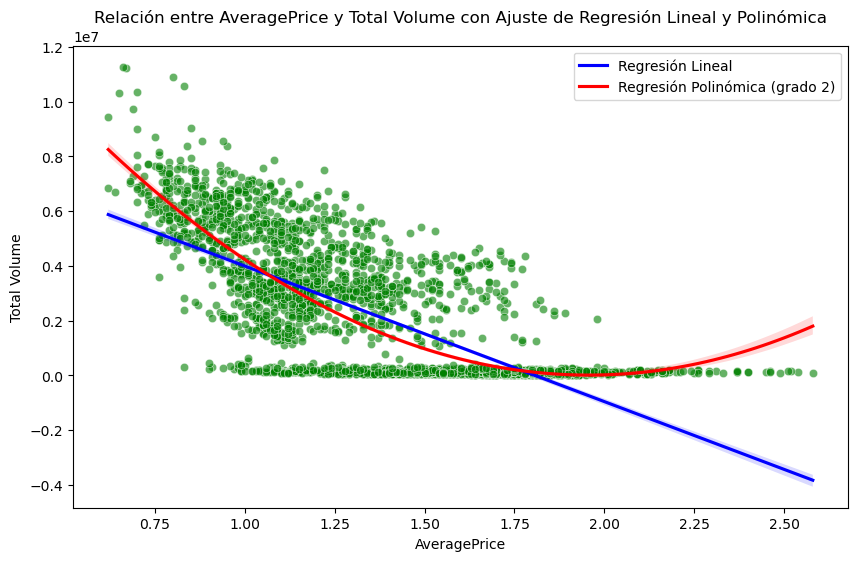

In [85]:
df_dispersion=greater_regions[['Total Volume', 'AveragePrice']]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_dispersion, x='AveragePrice', y='Total Volume', alpha=0.6, color='green')

#Añadimos una linea de regresión para ilustrar tendencias. Scatter=False para evitar superponer puntos de dispersion adicionales
sns.regplot(data=df_dispersion, x='AveragePrice', y='Total Volume', scatter=False, label="Regresión Lineal", color="blue")

#Vamos a graficar también la regresión polinómica de segundo grado (cuadrática) para contrastarla
sns.regplot(data=df_dispersion, x='AveragePrice', y='Total Volume', scatter=False, label="Regresión Polinómica (grado 2)", color="red", order=2)

# Personalización del gráfico
plt.title("Relación entre AveragePrice y Total Volume con Ajuste de Regresión Lineal y Polinómica")
plt.legend()
plt.show()

Podríamos concluir que la regresión polinómica de grado 2 es más ajustada, sobretodo en valores de AveragePrice mayores de 1.75


In [86]:
organic=greater_regions[(greater_regions['type']=='organic')]
df_dispersion_organic = organic[['Total Volume', 'AveragePrice']]

conventional=greater_regions[(greater_regions['type']=='conventional')]
df_dispersion_conventional = conventional[['Total Volume', 'AveragePrice']]

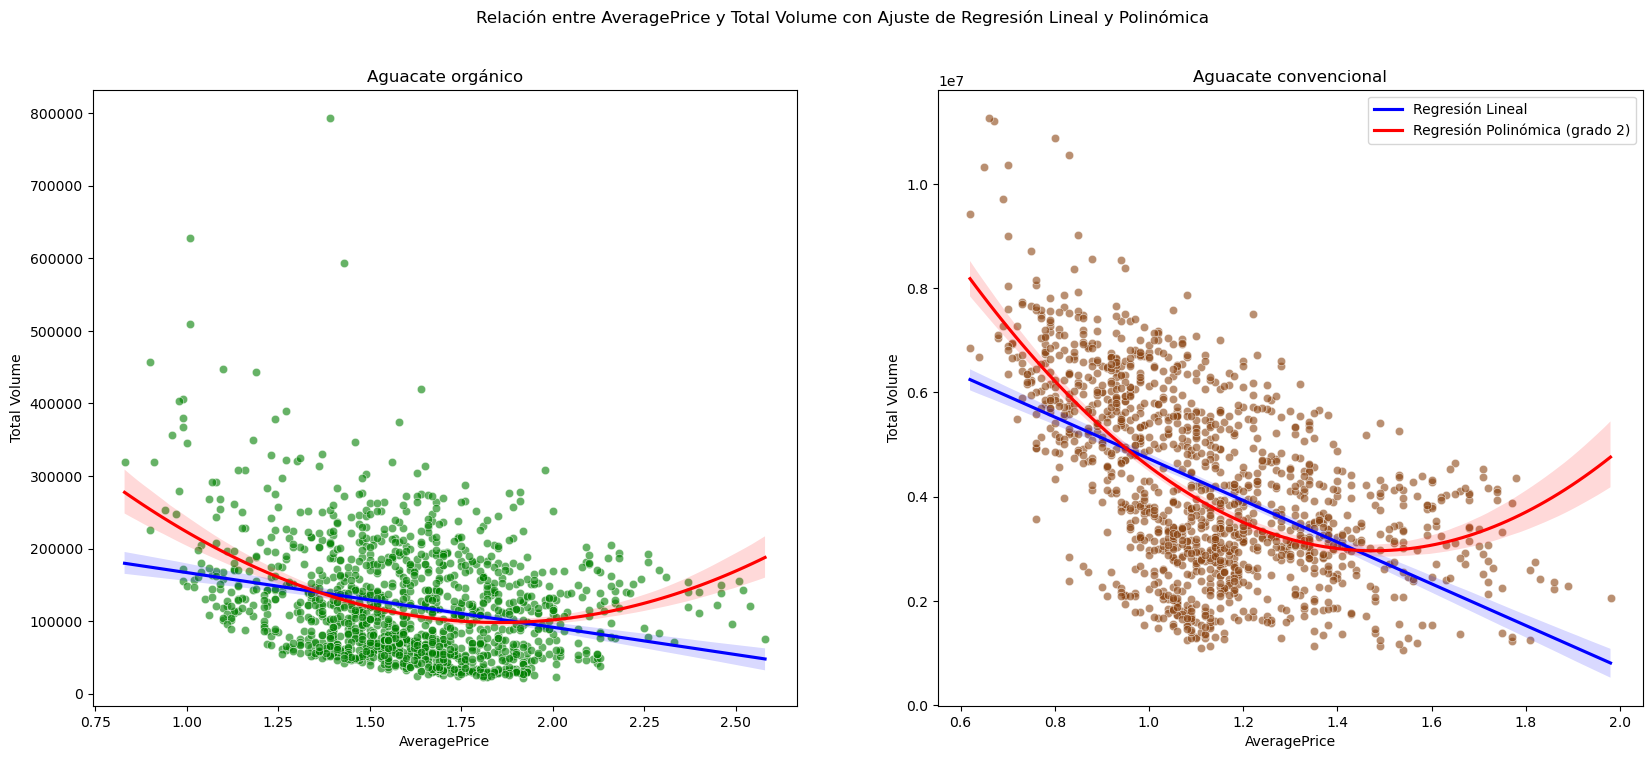

In [87]:
# Crear el gráfico de dispersión
fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharex=False)


# Aguacate ORGÁNICO
sns.scatterplot(data=df_dispersion_organic, x='AveragePrice', y='Total Volume', alpha=0.6, color='green', ax=axs[0])

#Añadimos una linea de regresión para ilustrar tendencias. Scatter=False para evitar superponer puntos de dispersion adicionales
sns.regplot(data=df_dispersion_organic, x='AveragePrice', y='Total Volume', scatter=False, label="Regresión Lineal", color="blue", ax=axs[0])

#Vamos a graficar también la regresión polinómica de segundo grado (cuadrática) para contrastarla
sns.regplot(data=df_dispersion_organic, x='AveragePrice', y='Total Volume', scatter=False, label="Regresión Polinómica (grado 2)", color="red", order=2, ax=axs[0])

# Aguacate CONVENTIONAL
sns.scatterplot(data=df_dispersion_conventional, x='AveragePrice', y='Total Volume', alpha=0.6, color='saddlebrown', ax=axs[1])
sns.regplot(data=df_dispersion_conventional, x='AveragePrice', y='Total Volume', scatter=False, label="Regresión Lineal", color="blue", ax=axs[1])
sns.regplot(data=df_dispersion_conventional, x='AveragePrice', y='Total Volume', scatter=False, label="Regresión Polinómica (grado 2)", color="red", order=2, ax=axs[1])

# Personalización del gráfico
fig.suptitle('Relación entre AveragePrice y Total Volume con Ajuste de Regresión Lineal y Polinómica')
axs[0].set_title('Aguacate orgánico')
axs[1].set_title('Aguacate convencional')
plt.legend()
plt.show()

#### 3. **Predicciones Mensuales Usando Datos Trimestrales:**


   - **Uso de Datos:** Agrupa datos por trimestres y segmenta en meses utilizando `Date`, `AveragePrice`, y `Total Volume`.
   - **Esperado:** 
     - Convierte la columna `Date` a tipo datetime si es necesario.
     - Agrupa los datos por trimestre y calcula el promedio de `AveragePrice` y `Total Volume`.
     - Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

In [144]:
df_predic=greater_regions[['Date', 'type', 'Total Volume', 'AveragePrice']]
df_prediccion=df_predic.copy()
# Asegurarse de que 'Date' esté en formato datetime
df_prediccion['Date'] = pd.to_datetime(df_prediccion['Date'])

# Ordenar por 'Date' en orden ascendente
df_ordenado_por_fecha = df_prediccion.sort_values(by='Date', ascending=True)

df_ordenado_por_fecha.head(20)

,Date,type,Total Volume,AveragePrice
9489,2015-01-04,organic,142349.77,1.24
1559,2015-01-04,conventional,3759282.62,1.09
1871,2015-01-04,conventional,1683795.30,1.01
2391,2015-01-04,conventional,5144267.01,0.77
2443,2015-01-04,conventional,3204112.16,0.98
2755,2015-01-04,conventional,5794410.58,0.89
11881,2015-01-04,organic,187548.30,1.40
363,2015-01-04,conventional,5777334.90,0.93
11569,2015-01-04,organic,27365.89,1.75
831,2015-01-04,conventional,3382800.12,1.02


In [145]:
# Obtener el primer año del DataFrame
primer_año = df_ordenado_por_fecha['Date'].dt.year.min()

# Filtrar por los dos primeros meses del primer año
df_filtrado = df_ordenado_por_fecha[
    (df_ordenado_por_fecha['Date'].dt.year == primer_año) &
    (df_ordenado_por_fecha['Date'].dt.month <= 2)
]

df_filtrado

,Date,type,Total Volume,AveragePrice
9489,2015-01-04,organic,142349.77,1.24
1559,2015-01-04,conventional,3759282.62,1.09
1871,2015-01-04,conventional,1683795.30,1.01
2391,2015-01-04,conventional,5144267.01,0.77
2443,2015-01-04,conventional,3204112.16,0.98
...,...,...,...,...
11562,2015-02-22,organic,37584.04,1.59
11510,2015-02-22,organic,81291.05,1.37
9950,2015-02-22,organic,56569.37,1.68
2436,2015-02-22,conventional,2796195.76,1.11


In [146]:
df_filtrado_3r = df_ordenado_por_fecha[
    (df_ordenado_por_fecha['Date'].dt.year == primer_año) &
    (df_ordenado_por_fecha['Date'].dt.month == 3)
]
df_filtrado_3r.head()

,Date,type,Total Volume,AveragePrice
9949,2015-03-01,organic,61260.09,1.69
11873,2015-03-01,organic,218957.86,1.40
11561,2015-03-01,organic,47299.44,1.46
1343,2015-03-01,conventional,2538981.60,1.14
1863,2015-03-01,conventional,1619341.49,1.09


In [147]:
#Definimos X e y para el modelo
X=df_filtrado[['Total Volume','AveragePrice']].drop(columns='AveragePrice')
y=df_filtrado['AveragePrice']

# Dividir los datos en conjuntos de entrenamiento y prueba: 
#   Tomaremos los 2 primeros meses completos como _train (de ahí, test_size=None);
#   Nuestro _test será el 3r mes
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state=None)

# Aplicar un Modelo de Regresión Lineal

# Entrenamos un **modelo de regresión lineal** usando los datos de entrenamiento.
model = LinearRegression()
model.fit(X_train, y_train)

# Ya tenemos los coeficientes y el término independiente!!!
print('Coeficientes: ', model.coef_)
print('Intercepto: ', model.intercept_)

# Sobrescribir conjuntos de prueba X_test y y_test con los valores de nuestro 3r mes
X_test = df_filtrado_3r[['Total Volume','AveragePrice']].drop(columns='AveragePrice')
y_test = df_filtrado_3r['AveragePrice']

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# Comparar Valores Predichos vs Reales

# Comparamos los primeros 10 valores predichos con los valores reales y calculamos 
# el **error porcentual**.

comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred[:10]
})

comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)

# Evaluar el Modelo

# Calculamos el **error cuadrático medio (MSE)** y el valor **R²** para evaluar 
# el rendimiento del modelo.

mse = mean_squared_error(y_test, y_pred)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"\nValor R² del modelo: {r2:.4f}")

Coeficientes:  [-1.17010144e-07]
Intercepto:  1.5353847356704293

Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0        1.69        1.528217          9.572977
1        1.40        1.509764         -7.840317
2        1.46        1.529850         -4.784262
3        1.14        1.238298         -8.622643
4        1.09        1.345905        -23.477555
5        1.70        1.531056          9.937875
6        0.84        0.751401         10.547493
7        1.61        1.528090          5.087553
8        1.15        1.093033          4.953643
9        1.85        1.528739         17.365482

Error cuadrático medio (MSE) del modelo: 0.0258

Valor R² del modelo: 0.7290


In [148]:
# COMPROBACIÓN MANUAL DE PREDICCIÓN (utilizando algebra lineal y teniendo en cuenta que los coeficientes pueden ser un array/matriz)
# Cambiamos pesos a un numpy array
pesos = np.array(model.coef_)

# Agregamos el intercepto al principio del array de pesos
indepe_mas_pesos = np.insert(pesos, 0, model.intercept_) #agregamos en la posicion 0 el intercept

# Añadir una columna constante de 1s al principio del DataFrame para el intercepto
df_filtrado_mes3 = X_test.copy()  # Para no modificar el original
df_filtrado_mes3.insert(0, 'Intercept', 1) #agregamos la columna 'Intercept' en la posición 0 y que esté llena de 1os

# Seleccionar las columnas en el orden correcto para la multiplicación
df_prediccion_tercer_mes = df_filtrado_mes3[['Intercept', 'Total Volume']].dot(indepe_mas_pesos)

# Mostrar las predicciones
auto_vs_manual = pd.DataFrame({
    'sklearn': y_pred[:10],
    'MANUAL': df_prediccion_tercer_mes.head(10).values
})
print('Comprobamos que el cálculo MANUAL de la predicción nos devuelve el mismo resultado que model.predict():\n', auto_vs_manual)

Comprobamos que el cálculo MANUAL de la predicción nos devuelve el mismo resultado que model.predict():
     sklearn    MANUAL
0  1.528217  1.528217
1  1.509764  1.509764
2  1.529850  1.529850
3  1.238298  1.238298
4  1.345905  1.345905
5  1.531056  1.531056
6  0.751401  0.751401
7  1.528090  1.528090
8  1.093033  1.093033
9  1.528739  1.528739


In [149]:
print(X.shape)
print(X_test.shape)

(128, 1)
(80, 1)


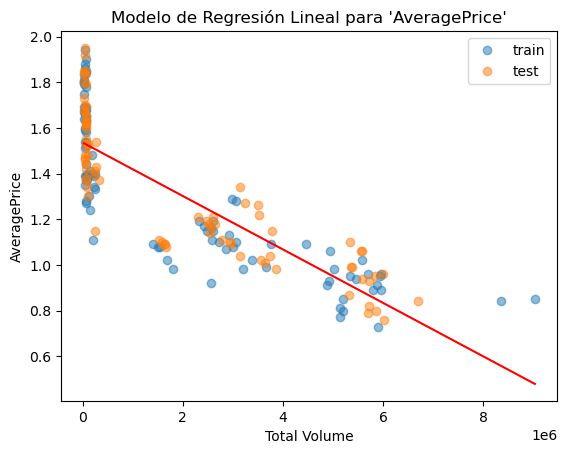

In [150]:
# Graficar
# Define xmin xmax for the model:
all_three_months = pd.concat([X, X_test], axis=0)
xmin, xmax = round(all_three_months['Total Volume'].min()), round(all_three_months['Total Volume'].max())

x_model = np.arange(xmin, xmax+1) # np.arange returns evenly spaced values within a given interval.
y_model=[model.intercept_+model.coef_*x for x in x_model]

plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(x_model, y_model,'r'); 

plt.title('Modelo de Regresión Lineal para \'AveragePrice\'')
plt.xlabel('Total Volume')
plt.ylabel('AveragePrice')
plt.legend()
plt.show()

In [151]:
# El atochamiento inicial probablemente es debido a que el volumen de aguacates orgánicos es mucho menor.
# Esto nos sugiere efectuar predicciones separadas para orgánico y convencional.

MODELO para aguacates de tipo "ORGANIC":
Error cuadrático medio (MSE) del modelo: 0.0267
Valor R² del modelo: 0.2029

MODELO para aguacates de tipo "CONVENTIONAL":
Error cuadrático medio (MSE) del modelo: 0.0103
Valor R² del modelo: 0.4615



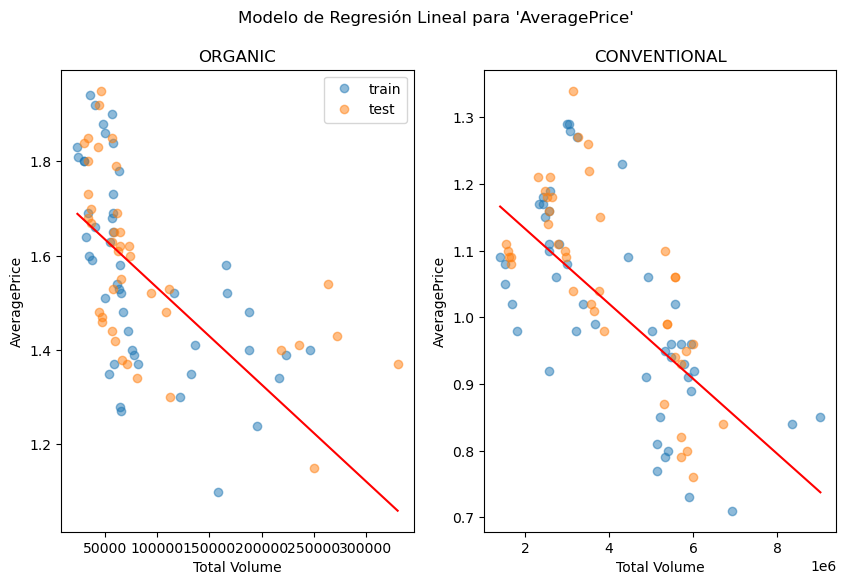

In [183]:
# ORGANICO
fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharex=False)
fig.suptitle('Modelo de Regresión Lineal para \'AveragePrice\'')
for tipo in df_filtrado.type.unique():
    df_tipo = df_filtrado[df_filtrado['type']==tipo].copy()
    df_tipo_3r = df_filtrado_3r[df_filtrado_3r['type']==tipo].copy()

    X=df_tipo[['Total Volume','AveragePrice']].drop(columns='AveragePrice')
    y=df_tipo['AveragePrice']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state=None)

    print(f'MODELO para aguacates de tipo "{tipo.upper()}":')

    # Entrenar modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Sobrescribir conjuntos de prueba X_test y y_test con los valores de nuestro 3r mes
    X_test = df_tipo_3r[['Total Volume','AveragePrice']].drop(columns='AveragePrice')
    y_test = df_tipo_3r['AveragePrice']

    y_pred = model.predict(X_test)

    # Evaluar el Modelo
    mse = mean_squared_error(y_test, y_pred)
    print(f"Error cuadrático medio (MSE) del modelo: {mse:.4f}")
    r2 = r2_score(y_test, y_pred)
    print(f"Valor R² del modelo: {r2:.4f}")
    print()

    # Preparar gráficas
    all_three_months = pd.concat([X, X_test], axis=0)
    xmin, xmax = round(all_three_months['Total Volume'].min()), round(all_three_months['Total Volume'].max())

    x_model = np.arange(xmin, xmax+1) # np.arange returns evenly spaced values within a given interval.
    y_model=[model.intercept_+model.coef_*x for x in x_model]

    index_graf = 0 if tipo=='organic' else 1
    axs[index_graf].plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
    axs[index_graf].plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
    axs[index_graf].plot(x_model, y_model,'r'); 
    axs[index_graf].set_title(tipo.upper())
    axs[index_graf].set_xlabel('Total Volume')
    axs[index_graf].set_ylabel('AveragePrice')
    if tipo=='organic': axs[index_graf].legend()

#### 4. **Predicciones Trimestrales:**


   - **Uso de Datos:** Agrupa los datos en trimestres usando solo variables numéricas.
   - **Esperado:** 
     - Agrupa los datos por trimestres usando `pd.Grouper()` con `freq='Q'` para obtener promedios.
     - Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

In [188]:
#Las agrupamos por trimestres (Q) y para average price hacemos la media y para total volume la media también
df_prediccion_M = greater_regions.copy()
agrup_Q=df_prediccion_M.groupby(pd.Grouper(key='Date', freq='QE')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean'})

agrup_Q.head()

,AveragePrice,Total Volume
Date,,
2015-03-31,1.303269,2.003434e+06
2015-06-30,1.344087,2.200042e+06
2015-09-30,1.408798,2.007397e+06
2015-12-31,1.313654,1.756701e+06
2016-03-31,1.200481,2.347942e+06


In [189]:
#Preparamos los datos, en X habrá lo que ya sabemos (datos de los dos primeros trimetres) y en y_avg, y_total las predicciones que queremos encontrar
df_trimestral=agrup_Q
X = []
y_avg_price = []
y_total_volume = []

for i in range(2, len(df_trimestral)):
    # Dos trimestres anteriores
    X.append([df_trimestral['AveragePrice'].iloc[i-1], df_trimestral['AveragePrice'].iloc[i-2],
               df_trimestral['Total Volume'].iloc[i-1], df_trimestral['Total Volume'].iloc[i-2]])
    # Valor del trimestre a predecir
    y_avg_price.append(df_trimestral['AveragePrice'].iloc[i])
    y_total_volume.append(df_trimestral['Total Volume'].iloc[i])

X = pd.DataFrame(X, columns=['AvgPrice_T1', 'AvgPrice_T2', 'TotalVolume_T1', 'TotalVolume_T2'])

y_avg_price = pd.Series(y_avg_price)
y_total_volume = pd.Series(y_total_volume)


In [190]:
# Función para entrenar modelos y hacer predicciones
def train_and_evaluate_models(X, y):
    # Modelo Lineal
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    y_pred_linear = linear_model.predict(X)
    
    # Modelo Polinómico (grados 2)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)

    return y_pred_linear, y_pred_poly

# Ajustar y evaluar para AveragePrice
y_pred_linear_avg_price, y_pred_poly_avg_price = train_and_evaluate_models(X, y_avg_price)

# Ajustar y evaluar para Total Volume
y_pred_linear_total_volume, y_pred_poly_total_volume = train_and_evaluate_models(X, y_total_volume)

In [ ]:
# Evaluar AveragePrice
print("Evaluación para AveragePrice con modelo de Regresión Lineal")
print("\nRMSE:", root_mean_squared_error(y_avg_price, y_pred_linear_avg_price))
print("R^2:", r2_score(y_avg_price, y_pred_linear_avg_price))
print("\nEvaluación para AveragePrice con modelo de Regresión Polinómica")
print("\nRMSE:", root_mean_squared_error(y_avg_price, y_pred_poly_avg_price))
print("R^2:", r2_score(y_avg_price, y_pred_poly_avg_price))

Evaluación para AveragePrice con modelo de Regresión Lineal

MSE: 0.003062201740545435

RMSE: 0.05533716418958813
R^2: 0.8386791995702274

Evaluación para AveragePrice con modelo de Regresión Polinómica

RMSE: 1.8786611010391506e-05
R^2: 0.9999999814068293


In [ ]:
# Evaluar Total Volume
print("\nEvaluación para Total Volume con modelo de regresión Lineal:")
print("\nRMSE:", root_mean_squared_error(y_total_volume, y_pred_linear_total_volume))
print("R^2:", r2_score(y_total_volume, y_pred_linear_total_volume))
print("\nEvaluación para Total Volume con modelo de regresión Polinómica:")
print("\nRMSE:", root_mean_squared_error(y_total_volume, y_pred_poly_total_volume))
print("R^2:", r2_score(y_total_volume, y_pred_poly_total_volume))


Evaluación para Total Volume con modelo de regresión Lineal:

MSE: 32890842641.453964

RMSE: 181358.3266394294
R^2: 0.664343484853052

Evaluación para Total Volume con modelo de regresión Polinómica:

RMSE: 92.68454884870347
R^2: 0.9999999123332792


#### 5. **Predicciones Anuales:**


   - **Uso de Datos:** Agrupa los datos en años, utilizando únicamente columnas numéricas.
   - **Esperado:** 
     - Agrupa los datos por año utilizando `pd.Grouper()` con `freq='Y'`.
     - Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

In [31]:
df_anual=df_prediccion_M.groupby(pd.Grouper(key='Date', freq='Y')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean'})
#Preparamos los datos
X = []
y_avg_price = []
y_total_volume = []
df_anual



/tmp/ipykernel_78170/194932742.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_anual=df_prediccion_M.groupby(pd.Grouper(key='Date', freq='Y')).agg({'AveragePrice': 'mean', 'Total Volume': 'mean'})


,AveragePrice,Total Volume
Date,,
2015-12-31,1.342452,1.991893e+06
2016-12-31,1.303209,2.186489e+06
2017-12-31,1.468573,2.198931e+06
2018-12-31,1.323281,2.727251e+06


In [32]:
for i in range(2, len(df_anual)):
    # Dos trimestres anteriores
    X.append([df_anual['AveragePrice'].iloc[i-1], df_anual['AveragePrice'].iloc[i-2],
            df_anual['Total Volume'].iloc[i-1], df_anual['Total Volume'].iloc[i-2]])
    # Valor del trimestre a predecir
    y_avg_price.append(df_anual['AveragePrice'].iloc[i])
    y_total_volume.append(df_anual['Total Volume'].iloc[i])

X = pd.DataFrame(X, columns=['AvgPrice_Y1', 'AvgPrice_Y2', 'TotalVolume_Y1', 'TotalVolume_Y2'])
y_avg_price = pd.Series(y_avg_price)
y_total_volume = pd.Series(y_total_volume)

In [33]:
# Función para entrenar y evaluar modelos
def train_and_evaluate_models(X, y):
    # Modelo Lineal
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    y_pred_linear = linear_model.predict(X)

    # Modelo Polinómico (grados 2)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)

    return y_pred_linear, y_pred_poly

y_pred_linear_avg_price, y_pred_poly_avg_price = train_and_evaluate_models(X, y_avg_price)


In [34]:
# Evaluar AveragePrice
print("\nEvaluación para AveragePrice con modelo de regresión Lineal:")
rmse_linear_avg_price = root_mean_squared_error(y_avg_price, y_pred_linear_avg_price)
r2_linear_avg_price = r2_score(y_avg_price, y_pred_linear_avg_price)
print("RMSE:", rmse_linear_avg_price)
print("R^2:", r2_linear_avg_price)

print("\nEvaluación para AveragePrice con modelo de regresión Polinómica:")
y_pred_poly_avg_price = train_and_evaluate_models(X, y_avg_price)[1]  
rmse_poly_avg_price = root_mean_squared_error(y_avg_price, y_pred_poly_avg_price)
r2_poly_avg_price = r2_score(y_avg_price, y_pred_poly_avg_price)

print("RMSE:", rmse_poly_avg_price)
print("R^2:", r2_poly_avg_price)


Evaluación para AveragePrice con modelo de regresión Lineal:
RMSE: 0.0
R^2: 1.0

Evaluación para AveragePrice con modelo de regresión Polinómica:
RMSE: 1.5700924586837752e-16
R^2: 1.0


In [36]:
# Ajustar y evaluar para Total Volume
y_pred_linear_total_volume, y_pred_poly_total_volume = train_and_evaluate_models(X, y_total_volume)

# Evaluar Total Volume
print("\nEvaluación para Total Volume con modelo de regresión Lineal:")
rmse_linear_total_volume = root_mean_squared_error(y_total_volume, y_pred_linear_total_volume)
r2_linear_total_volume = r2_score(y_total_volume, y_pred_linear_total_volume)

print("RMSE:", rmse_linear_total_volume)
print("R^2:", r2_linear_total_volume)

print("\nEvaluación para Total Volume con modelo de regresión Polinómica:")
rmse_poly_total_volume = root_mean_squared_error(y_total_volume, y_pred_poly_total_volume)
r2_poly_total_volume = r2_score(y_total_volume, y_pred_poly_total_volume)

print("RMSE:", rmse_poly_total_volume)
print("R^2:", r2_poly_total_volume)


Evaluación para Total Volume con modelo de regresión Lineal:
RMSE: 4.656612873077393e-10
R^2: 1.0

Evaluación para Total Volume con modelo de regresión Polinómica:
RMSE: 4.656612873077393e-10
R^2: 1.0


#### 6. **Desarrollo de Modelos de Regresión Múltiple:** 


   - **Uso de Datos:** Selecciona varias variables numéricas como `Total Volume`, `4046`, `4225`, `4770`, y `Total Bags` para predecir `AveragePrice`.
   - **Esperado:** 
     - Define las variables independientes (X) y dependientes (y).
     - Ajusta modelos de regresión múltiple.
     - Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.

In [10]:
df_ej6=greater_regions[['Total Volume', '4046','4225','4770','Total Bags', 'AveragePrice']]
df_ej6=df_ej6.copy()
df_ej6.head()

,Total Volume,4046,4225,4770,Total Bags,AveragePrice
312,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,0.90
313,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,0.94
314,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,0.87
315,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,0.78
316,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,0.91


In [52]:
#Vamos a definir las variables
X=df_ej6[['Total Volume', '4046','4225','4770','Total Bags']]
y=df_ej6['AveragePrice']

# Función para entrenar modelos y hacer predicciones
def train_and_evaluate_models(X, y):
    # Modelo Lineal
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    y_pred_linear = linear_model.predict(X)

    # Extraer coeficientes e intercepto del modelo lineal
    pesos_lineal = linear_model.coef_
    intercept_lineal = linear_model.intercept_
    
    # Modelo Polinómico (grados 2)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)

    # Extraer coeficientes e intercepto del modelo polinomial
    pesos_poly = poly_model.coef_
    intercept_poly = poly_model.intercept_

    # Guardamos las características generadas
    feature_names = poly.get_feature_names_out(X.columns)

    return y_pred_linear, y_pred_poly, pesos_lineal, pesos_poly, intercept_lineal, intercept_poly, feature_names

# Ajustar y evaluar para AveragePrice
y_pred_linear, y_pred_poly, pesos_lineal, pesos_poly, intercept_lineal, intercept_poly, feature_names = train_and_evaluate_models(X, y)



In [53]:
# Evaluar AveragePrice
print("Evaluación para AveragePrice con modelo de Regresión Lineal")
print("\nRMSE:", mean_squared_error(y, y_pred_linear_avg_price))
print("R^2:", r2_score(y, y_pred_linear_avg_price))
print("\nEvaluación para AveragePrice con modelo de Regresión Polinómica")
print("\nRMSE:", mean_squared_error(y, y_pred_poly_avg_price))
print("R^2:", r2_score(y, y_pred_poly_avg_price))

Evaluación para AveragePrice con modelo de Regresión Lineal

RMSE: 0.055323473782638175
R^2: 0.5472726729669551

Evaluación para AveragePrice con modelo de Regresión Polinómica

RMSE: 0.052086027764275546
R^2: 0.5737655914714156


#### 7. **Análisis de Coeficientes de Regresión Múltiple:**


   - **Uso de Datos:** Examina los coeficientes de los modelos de regresión múltiple ajustados.
   - **Esperado:** 
     - Extrae los coeficientes del modelo ajustado.
     - Interpreta los coeficientes para entender el impacto de cada variable numérica en `AveragePrice`.
     - Comenta sobre las variables más significativas y su relevancia.

In [54]:
#extraemos pesos de los modelos
print('Modelos lineal:\n')
print('Pesos',pesos_lineal)
print('Intercept:',intercept_lineal)
print('\nModelo Polinómico:\n')
print('Pesos',pesos_poly)
print('Intercept:',intercept_poly)


Modelos lineal:

Pesos [-1.03457910e-05  1.01882305e-05  1.02651626e-05  9.87960006e-06
  1.03199239e-05]
Intercept: 1.591056683494568

Modelo Polinómico:

Pesos [ 0.00000000e+00  9.16370146e-04 -9.16722052e-04 -9.16593467e-04
 -9.16750142e-04 -9.16148800e-04  4.11074515e-08 -8.57901765e-08
 -8.12120882e-08  4.98634163e-08 -9.12941050e-08  4.46827588e-08
  8.47874019e-08 -4.62878939e-08  9.48693668e-08  4.01046597e-08
 -5.08661491e-08  9.02912919e-08 -9.09716368e-08 -4.07843948e-08
  5.01866059e-08]
Intercept: 1.6048917383543793


In [59]:
# Mostrar los coeficientes generados por el polinómico con sus nombres
pd.DataFrame({'Feature': feature_names, 'Coefficient': pesos_poly})


,Feature,Coefficient
0,1,0.000000e+00
1,Total Volume,9.163701e-04
2,4046,-9.167221e-04
3,4225,-9.165935e-04
4,4770,-9.167501e-04
5,Total Bags,-9.161488e-04
6,Total Volume^2,4.110745e-08
7,Total Volume 4046,-8.579018e-08
8,Total Volume 4225,-8.121209e-08
9,Total Volume 4770,4.986342e-08


### Modelo lineal:
Para predecir AveragePrice en el modelo lineal vemos que el peso menos significativo es la de la columna '4770'. El resto están más o menos igualadas. Todas de manera directa excepto el Total Volume que es inversamente proporcional.

### Modelo polinómico:
Coeficientes Negativos:
Muchos de los coeficientes son negativos, lo que indica que esas combinaciones de variables tienen un efecto negativo sobre el AveragePrice.
Por ejemplo, el coeficiente de Total Volume - 4046 es -8.579018e-08, lo que significa que un aumento en la interacción entre el volumen total y el código 4046 reduce el valor de AveragePrice.

Coeficientes Positivos:
Algunos coeficientes son positivos, lo que indica que el aumento en esas variables o combinaciones tiene un efecto positivo en AveragePrice.
Por ejemplo, el coeficiente de Total Volume^2 es 4.110745e-08, lo que indica que el aumento cuadrático en el Total Volume aumenta el valor de AveragePrice, aunque el efecto es muy pequeño.



#### 8. **Modelos de Regresión para Diferenciar Volúmenes de Ventas:**


   - **Uso de Datos:** Usa `AveragePrice`, `Total Volume`, `4046`, `4225`, y `4770`.
   - **Esperado:** 
     - Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan `AveragePrice`.
     - Compara los resultados de regresión lineal y polinómica.
     - Presenta las conclusiones de tus análisis.

#### 9. **Análisis de la Influencia de las Ventas Totales en el Precio Promedio:**


   - **Uso de Datos:** Usa `Total Volume`, `AveragePrice`, y `Total Bags`.
   - **Esperado:** 
     - Ajusta un modelo de regresión lineal y polinómica para ver cómo varía `AveragePrice` en función del volumen total de ventas.
     - Evalúa la significancia de los coeficientes y discute su relevancia.

#### 10. **Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:**


  - **Uso de Datos:** Usa `AveragePrice`, `4046`, `4225`, `4770`, y `Total Volume`.
  - **Esperado:** 
    - Ajusta modelos de regresión lineal y polinómica.
    - Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
    - Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos. 

In [60]:
#Vamos a definir las variables
X=df_ej6[['4046','4225','4770','Total Volume']]
y=df_ej6['AveragePrice']

# Función para entrenar modelos y hacer predicciones
def train_and_evaluate_models(X, y):
    # Modelo Lineal
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    y_pred_linear = linear_model.predict(X)

    # Extraer coeficientes e intercepto del modelo lineal
    pesos_lineal = linear_model.coef_
    intercept_lineal = linear_model.intercept_
    
    # Modelo Polinómico (grados 2)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)

    # Extraer coeficientes e intercepto del modelo polinomial
    pesos_poly = poly_model.coef_
    intercept_poly = poly_model.intercept_

    # Guardamos las características generadas
    feature_names = poly.get_feature_names_out(X.columns)

    return y_pred_linear, y_pred_poly, pesos_lineal, pesos_poly, intercept_lineal, intercept_poly, feature_names

# Ajustar y evaluar para AveragePrice
y_pred_linear, y_pred_poly, pesos_lineal, pesos_poly, intercept_lineal, intercept_poly, feature_names = train_and_evaluate_models(X, y)


In [61]:
# Evaluar AveragePrice
print("Evaluación para AveragePrice con modelo de Regresión Lineal")
print("\nRMSE:", mean_squared_error(y, y_pred_linear_avg_price))
print("R^2:", r2_score(y, y_pred_linear_avg_price))
print("\nEvaluación para AveragePrice con modelo de Regresión Polinómica")
print("\nRMSE:", mean_squared_error(y, y_pred_poly_avg_price))
print("R^2:", r2_score(y, y_pred_poly_avg_price))

Evaluación para AveragePrice con modelo de Regresión Lineal

RMSE: 0.055323473782638175
R^2: 0.5472726729669551

Evaluación para AveragePrice con modelo de Regresión Polinómica

RMSE: 0.052086027764275546
R^2: 0.5737655914714156


Tanto el RMSE como el R^2 son mejores para el modelo de Regresión Polinómica. Mejor significa que:
El RMSE es un poco menor para el polinómico.
R^2 es mayor para el polinómico.